<center>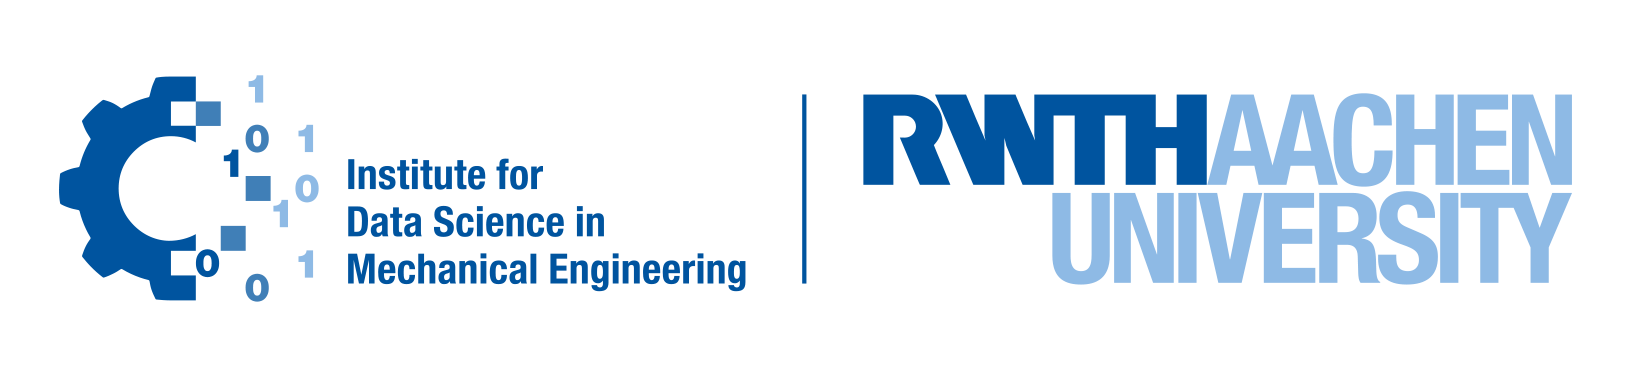</center>

**MOOC Reinforcement Learning** <br> 
RWTH Aachen University, DSME (Prof. Sebastian Trimpe, Paul Brunzema) <br>

---

# **Dyna-Q vs Q-Learning on the FrozenLake Environment**
_(Adapted from FrozenLake-v1 from [farama.org](https://gymnasium.farama.org/environments/toy_text/frozen_lake/) under the MIT licence.)_

In the following you will implement the Dyna-Q algorithm from the lecture to solve the frozen lake environment. The core elements of this environment are summarized below.

<center> 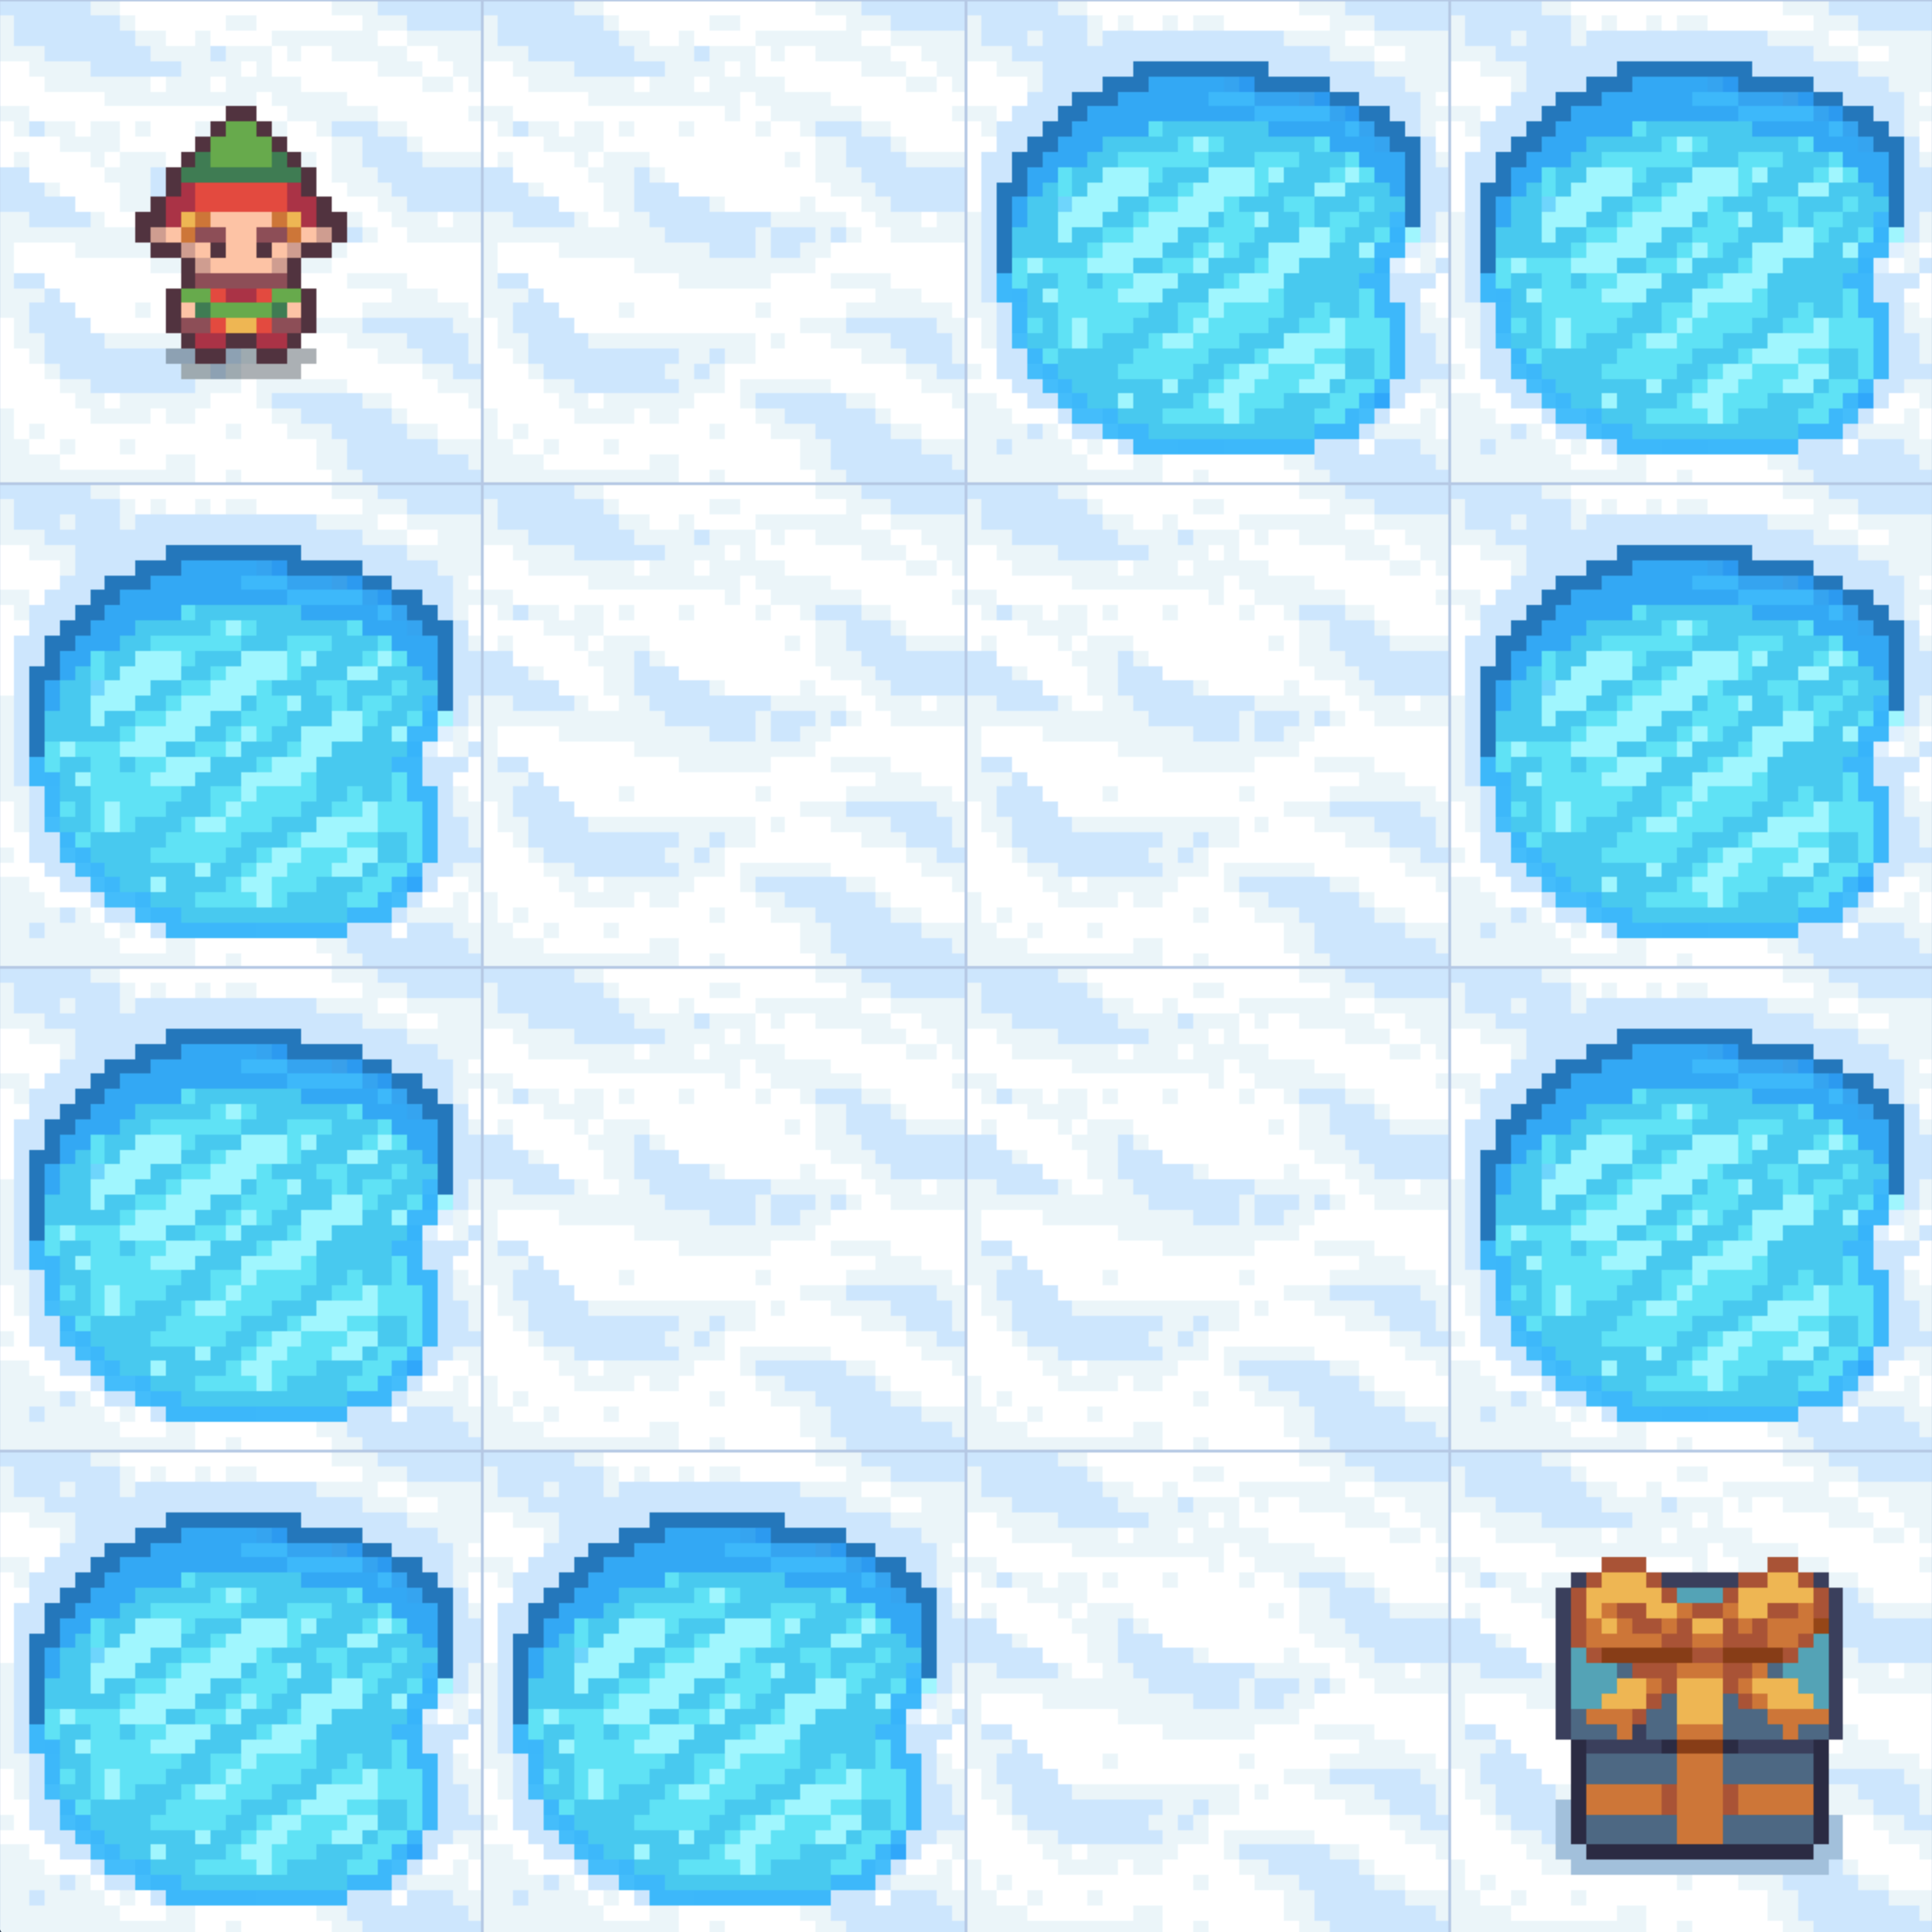 </center>

```
Description:

    Frozen lake involves crossing a frozen lake from Start(S) to Goal(G) without falling into any Holes(H)by walking over the Frozen(F) lake. The agent may not always move in the intended direction due to the slippery nature of the frozen lake.


Action Space:

    The agent takes a 1-element vector for actions.
    The action space is `(dir)`, where `dir` decides direction to move in which can be:

    - 0: LEFT
    - 1: DOWN
    - 2: RIGHT
    - 3: UP

Observation Space:

    The observation is a value representing the agent's current position as
    current_row * nrows + current_col (where both the row and col start at 0).
    For example, the goal position in the 4x4 map can be calculated as follows: 3 * 4 + 3 = 15.
    The number of possible observations is dependent on the size of the map.
    For example, the 4x4 map has 16 possible observations.

Rewards:

    Reward schedule:
    - Reach goal(G): +1
    - Reach hole(H): 0
    - Reach frozen(F): 0
```

In [ ]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)

## Design of the Agent
The algorithm for Dyna-Q equals the Q-Learning algorithm, however, there is an addition. Each step is used to improve a deterministic model of the environment, from which random samples are generated to improve the value function.
The agent is similar to the already presented Q-Learning agent , with two additions:
* `self.model` is a model of the environment, containing the subsequent state and reward for each state-action pair
+ `self.visited_states_and_actions` keeps track of the visited state-action pairs

In [ ]:
class StateActionTracker:
    def __init__(self):
        self.states = {}
        self.actions = {}

    def add_state_action_pair(self, state, action):
        if state not in self.states:
            self.states[state] = 1
            self.actions[state] = set([action])
        else:
            self.states[state] += 1
            if action not in self.actions[state]:
                self.actions[state].add(action)

    def get_state(self):
        if self.states:
            return np.random.choice(list(self.states.keys()))

    def get_action(self, state):
        if state in self.actions and self.actions[state]:
            return np.random.choice(list(self.actions[state]))


class TD_Agent():
    def __init__(self, env, gamma=1.0, learning_rate=0.05, epsilon=0.1, dyn_q_iters=25):
        self.env = env
        self.action_value_fn = np.zeros((self.env.observation_space.n, self.env.action_space.n)) # the q-fn
        self.model = np.zeros((self.env.observation_space.n, self.env.action_space.n, 2))
        self.visited_states_and_actions = StateActionTracker()
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
        self.dyn_q_iters = dyn_q_iters

    def get_random_action(self):
        random_action = np.random.choice(range(self.env.action_space.n))
        return random_action

    def get_best_action(self, obs):
        best_action = np.random.choice(np.flatnonzero(np.isclose(self.action_value_fn[obs], self.action_value_fn[obs].max(), rtol=0.01)))
        return best_action

    def epsilon_greedy_policy(self, obs):
        # returns action, choosing a random action with probability epsilon or the best action based on Q(s,a)
        randomly = np.random.random() < self.epsilon
        if randomly:
            action = self.get_random_action()
        else:
            action = self.get_best_action(obs)
        return action

    def q_learning_update(self, obs, action, next_obs, reward):
        best_next_action = self.get_best_action(next_obs)
        td_target = reward + self.gamma * self.action_value_fn[next_obs][best_next_action]
        update = (1-self.learning_rate) * self.action_value_fn[obs][action] + self.learning_rate * td_target
        self.action_value_fn[obs][action] = update

    def q_learning(self, num_episodes):
        returns = []
        for i in range(num_episodes):
            returns_i = 0
            obs, info = env.reset()
            done = False
            while not done:
                # Generate next_obs and reward based on state-action pair
                action = self.epsilon_greedy_policy(obs)
                next_obs, reward, done, truncated, info = env.step(action)
                # Update the value function
                self.q_learning_update(obs, action, next_obs, reward)
                returns_i += reward
                obs = next_obs
            returns.append(returns_i)
        return returns

    def dyna_q(self, num_episodes):
        returns = []
        for i in range(num_episodes):
            returns_i = 0
            obs, info = env.reset()
            done = False
            while not done:
                # Generate next_obs and reward based on state-action pair
                action = self.epsilon_greedy_policy(obs)
                next_obs, reward, done, truncated, info = env.step(action)

                # Update the value function
                self.q_learning_update(obs, action, next_obs, reward)

                ###################################################
                # YOU WILL IMPLEMENT THIS FUNCTION IN TASK 1
                # Update the model
                self.update_model(obs, action, next_obs, reward)
                ###################################################

                self.visited_states_and_actions.add_state_action_pair(obs, action)

                returns_i += reward
                obs = next_obs

                # Perform more updates using the model
                for j in range(self.dyn_q_iters):

                    ###################################################
                    # YOU WILL IMPLEMENT THIS FUNCTION IN TASK 2
                    sim_state, sim_action, sim_next_state, sim_reward = self.simulate_experience()
                    ###################################################

                    self.q_learning_update(sim_state, sim_action, int(sim_next_state), sim_reward)

            returns.append(returns_i)
        return returns

    def reset(self):
        self.action_value_fn = np.zeros((self.env.observation_space.n, self.env.action_space.n))

## Task 1

Your task is to implement the model update for Dyna-Q.

_Hint: For this implementation you have access to the following methods/variables:_

- `self.model`: The model of the MDP which can be indexed with as state and action as `self.model[state][action]`.

In [ ]:
def update_model(self, obs, action, next_obs, reward):

    # YOUR CODE HERE
    raise NotImplementedError()


# This adds the function as a method to the specified class.
setattr(TD_Agent, "update_model", update_model)

## Task 2

Your task is to implement the model update for Dyna-Q.

_Hint: For this implementation you have access to the following methods/variables:_

- `self.model`: The model of the MDP which can be indexed with as state and action as `self.model[state][action]`.
- `self.visited_states_and_actions`: The object that stores all state that have been visited. See in the definition of the `StateActionTracker`-class how to access the states and corresponding actions.

In [ ]:
def simulate_experience(self):

    # YOUR CODE HERE
    raise NotImplementedError()

    return sim_state, sim_action, sim_next_state, sim_reward


# This adds the function as a method to the specified class.
setattr(TD_Agent, "simulate_experience", simulate_experience)

## Evaluation of the Training
To compare the two methods, both agents are trained with the same properties. Epsilon is set to 0.2, allowing for occasional random behavior of the agent. We show the return of both agents over the episodes. To allow for improved visualization, the returns are smoothed using the following function:

In [ ]:
def smooth(array, size):
    window_size = size
    filter = np.ones(window_size) / window_size
    smoothed_array = np.convolve(array, filter, mode='same')
    return smoothed_array

We train the agents and prove that the learned value functions lead to comparable policies. Additionally we evaluate the policy within the environment:

In [ ]:
def plot_action_value(value_fn, title):
    action_value_grid = value_fn
    top = action_value_grid[:,3].reshape((4,4))
    top_value_positions = [(0.38,0.25),(1.38,0.25),(2.38,0.25),(3.38,0.25),
                        (0.38,1.25),(1.38,1.25),(2.38,1.25),(3.38,1.25),
                        (0.38,2.25),(1.38,2.25),(2.38,2.25),(3.38,2.25),
                        (0.38,3.25),(1.38,3.25),(2.38,3.25),(3.38,3.25)]
    right = action_value_grid[:,2].reshape((4,4))
    right_value_positions = [(0.65,0.5),(1.65,0.5),(2.65,0.5),(3.65,0.5),
                        (0.65,1.5),(1.65,1.5),(2.65,1.5),(3.65,1.5),
                        (0.65,2.5),(1.65,2.5),(2.65,2.5),(3.65,2.5),
                        (0.65,3.5),(1.65,3.5),(2.65,3.5),(3.65,3.5)]
    bottom = action_value_grid[:,1].reshape((4,4))
    bottom_value_positions = [(0.38,0.8),(1.38,0.8),(2.38,0.8),(3.38,0.8),
                        (0.38,1.8),(1.38,1.8),(2.38,1.8),(3.38,1.8),
                        (0.38,2.8),(1.38,2.8),(2.38,2.8),(3.38,2.8),
                        (0.38,3.8),(1.38,3.8),(2.38,3.8),(3.38,3.8)]
    left = action_value_grid[:,0].reshape((4,4))
    left_value_positions = [(0.05,0.5),(1.05,0.5),(2.05,0.5),(3.05,0.5),
                        (0.05,1.5),(1.05,1.5),(2.05,1.5),(3.05,1.5),
                        (0.05,2.5),(1.05,2.5),(2.05,2.5),(3.05,2.5),
                        (0.05,3.5),(1.05,3.5),(2.05,3.5),(3.05,3.5)]
    fig, ax=plt.subplots(figsize=(12,5))
    ax.set_ylim(4, 0)

    def quatromatrix(left, bottom, right, top, ax=None, triplotkw={},tripcolorkw={}):
        if not ax:
            ax = plt.gca()
        n = left.shape[0]
        m = left.shape[1]
        a = np.array([[0,0],[0,1],[.5,.5],[1,0],[1,1]])
        tr = np.array([[0,1,2], [0,2,3],[2,3,4],[1,2,4]])
        A = np.zeros((n*m*5,2))
        Tr = np.zeros((n*m*4,3))
        for i in range(n):
            for j in range(m):
                k = i*m+j
                A[k*5:(k+1)*5,:] = np.c_[a[:,0]+j, a[:,1]+i]
                Tr[k*4:(k+1)*4,:] = tr + k*5
        C = np.c_[ left.flatten(), bottom.flatten(), 
                right.flatten(), top.flatten()   ].flatten()
        triplot = ax.triplot(A[:,0], A[:,1], Tr, **triplotkw)
        tripcolor = ax.tripcolor(A[:,0], A[:,1], Tr, facecolors=C, **tripcolorkw)
        return tripcolor

    tripcolor = quatromatrix(left, top, right, bottom, ax=ax,
                triplotkw={"color":"k", "lw":1},
                tripcolorkw={"cmap": "coolwarm"})
    ax.margins(0)
    ax.set_aspect("equal")
    fig.colorbar(tripcolor)
    ax.set_title(title)
    for i, (xi, yi) in enumerate(top_value_positions):
        plt.text(xi, yi, round(top.flatten()[i], 2), size=11, color="w")
    for i, (xi, yi) in enumerate(right_value_positions):
        plt.text(xi, yi, round(right.flatten()[i], 2), size=11, color="w")
    for i, (xi, yi) in enumerate(left_value_positions):
        plt.text(xi, yi, round(left.flatten()[i], 2), size=11, color="w")
    for i, (xi, yi) in enumerate(bottom_value_positions):
        plt.text(xi, yi, round(bottom.flatten()[i], 2), size=11, color="w")
    plt.show()

We will use the environment shown below. Through the variable `env_map` you can also change this environment if you wish to. However, if you change the format from 4x4 to something else the plotting functions may be broken.

<center> 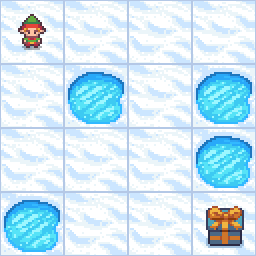 </center>

In [ ]:
# Set values
env_map = ["SFFF", "FHFH", "FFFH", "HFFG"]
env = gym.make('FrozenLake-v1', render_mode=None, desc=env_map, is_slippery=False)
filter = 50
num_episodes = 10000
env.reset()

agent_1 = TD_Agent(env, gamma=0.9, learning_rate=0.1, epsilon=0.2)
q_learning_training_history = smooth(agent_1.q_learning(num_episodes=num_episodes), filter)
plot_action_value(agent_1.action_value_fn, "Q-Learning")

In [ ]:
agent_2 = TD_Agent(env, gamma=0.9, learning_rate=0.1, epsilon=0.2)
dyna_q_training_history = smooth(agent_2.dyna_q(num_episodes=num_episodes), filter)
plot_action_value(agent_2.action_value_fn, "Dyna-Q")

Lastly, we compare the convergence speed of Q-Learning compared to Dyna-Q:

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and an axes.
ax.plot(range(num_episodes), q_learning_training_history, label="Q-Learning")
ax.plot(range(num_episodes), dyna_q_training_history, label="Dyna-Q")

ax.grid(False)
ax.set_xlabel('Episodes')
ax.set_ylabel('Returns')
ax.set_title("Comparison of Dyna-Q and Q-Learning")
ax.set_ylim(-1, 2)
ax.set_xlim(0, 1000)
ax.legend()
plt.show()

## Conclussion

**Question 1.** Summarize your findings regarding the difference in convergence speed.

YOUR ANSWER HERE

**Question 2.** Also, if you are interested, play around with the hyperparameters of the algorithm. Does Dyna-Q always converge faster? What could be reasons for Q-Learning converging faster than Dyna-Q for some random seeds?

YOUR ANSWER HERE

---
Some of the coding examples in this MOOC are based on examples in “Reinforcement Learning: An Introduction”, Second Edition, MIT Press, 2018, by Richard S. Sutton and Andrew G. Barto under the license [CC-BY-NC-ND 2.0](https://creativecommons.org/licenses/by-nc-nd/2.0/).

The PDF is freely available online: http://incompleteideas.net/book/RLbook2018.pdf.

<center>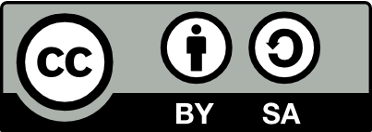</center>

This work was originally created by Sebastian Trimpe and Paul Brunzema. <br> 
It is licensed under Attribution-ShareAlike 4.0 International [(CC-BY-SA 4.0)](https://creativecommons.org/licenses/by-sa/4.0/).